In [108]:
import pyforest
from my_module import *

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.features import PCA
from yellowbrick.features import rank1d, rank2d
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ROCAUC

import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# EDA

In [122]:
df = pd.read_csv("billets.csv", sep=";")
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1463.00,1500.00,1500.00
mean,171.96,104.03,103.92,4.49,3.15,112.68
std,0.31,0.30,0.33,0.66,0.23,0.87
min,171.04,103.14,102.82,2.98,2.27,109.49
25%,171.75,103.82,103.71,4.01,2.99,112.03
50%,171.96,104.04,103.92,4.31,3.14,112.96
75%,172.17,104.23,104.15,4.87,3.31,113.34
max,173.01,104.88,104.95,6.90,3.91,114.44


In [5]:
remove_duplicates(df)

0 duplicates have been removed


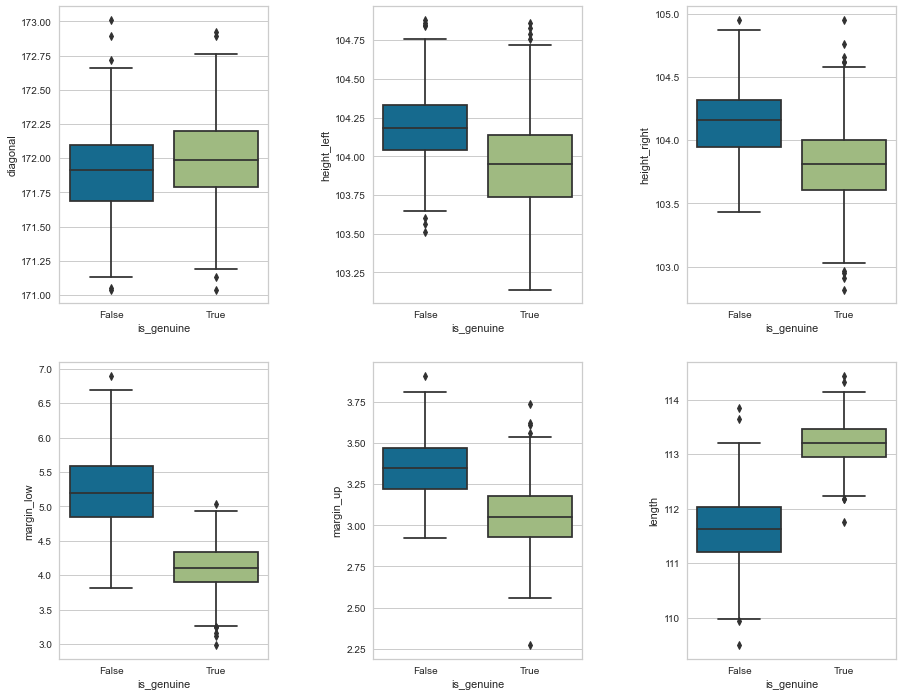

In [6]:
attributes = df.columns.drop(["is_genuine"])

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.2, wspace=0.5)
for a, ax in zip(attributes, axs.ravel()):
    sns.boxplot(y=df[a], x=df["is_genuine"], ax=ax)
plt.show();

In [7]:
# Suppression des outliers True
df_no_out_true = df[df["is_genuine"] == True]
for col in df.drop(["is_genuine"], axis=1):
    df_no_out_true = drop_outliers(df_no_out_true, col)
    
df_no_out_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 1 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    974 non-null    bool   
 1   diagonal      974 non-null    float64
 2   height_left   974 non-null    float64
 3   height_right  974 non-null    float64
 4   margin_low    949 non-null    float64
 5   margin_up     974 non-null    float64
 6   length        974 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 54.2 KB


In [248]:
# Suppression des outliers False
df_no_out_false = df[df["is_genuine"] == False]
for col in df.drop(["is_genuine"], axis=1):
    df_no_out_false = drop_outliers(df_no_out_false, col)
df_no_out_false.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1000 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    480 non-null    bool   
 1   diagonal      480 non-null    float64
 2   height_left   480 non-null    float64
 3   height_right  480 non-null    float64
 4   margin_low    472 non-null    float64
 5   margin_up     480 non-null    float64
 6   length        480 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 26.7 KB


In [9]:
# Création du df sans outliers
df_no_out = pd.concat([df_no_out_true, df_no_out_false], axis=0)
df_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 1 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1454 non-null   bool   
 1   diagonal      1454 non-null   float64
 2   height_left   1454 non-null   float64
 3   height_right  1454 non-null   float64
 4   margin_low    1421 non-null   float64
 5   margin_up     1454 non-null   float64
 6   length        1454 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 80.9 KB


Perte de 46 individus, soit 3% du dataframe

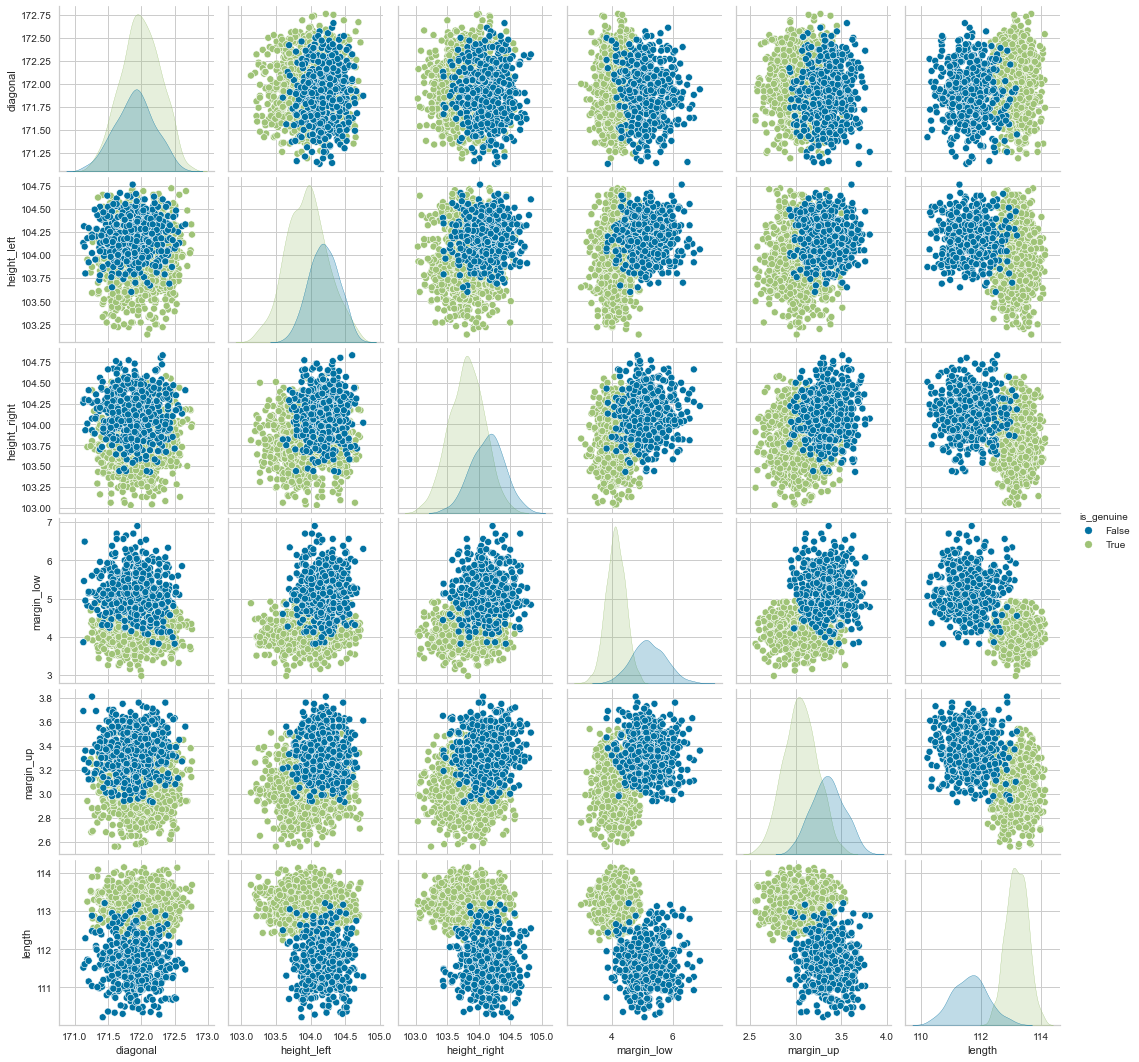

In [249]:
sns.pairplot(df_no_out, hue="is_genuine")
plt.show();

Loi normale observée pour chacune des variables selon "is_genuine" avec kurtosis élevé pour True et bas pour False en général.  
length et margin_low semblent de bonnes variables pour différencier les vrais des faux billets.

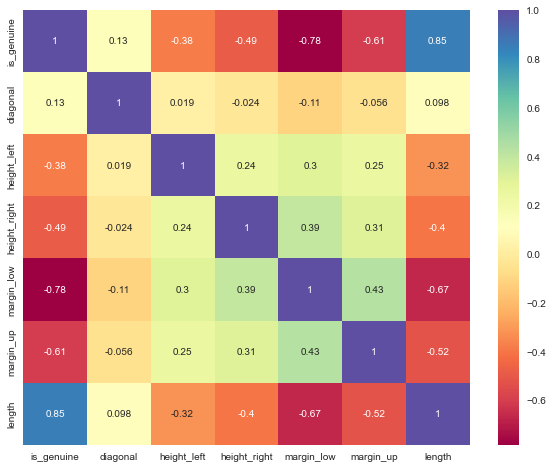

In [110]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show();

Les variables length et margin_low sont les plus corrélées avec is_genuine. Elles sont également négativement corrélées entre elles.

# Gestion des NaN

### Interpolate method

Fonction interpolate (méthode linear) pour éventuellement faire des comparaisons avec la régression linéaire.

In [12]:
df_linear = df.copy()
df_linear["margin_low"].interpolate(method='linear', axis=0, inplace=True)

In [13]:
df_linear[df.index == 99]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
99,True,171.93,104.07,104.18,4.34,3.14,113.08


### Linear regression method

Utilisation de la régression linéaire pour déterminer les valeurs manquantes de margin_low par rapport aux autres variables.

In [14]:
df_true = df[df["is_genuine"] == True]
df_false = df[df["is_genuine"] == False]

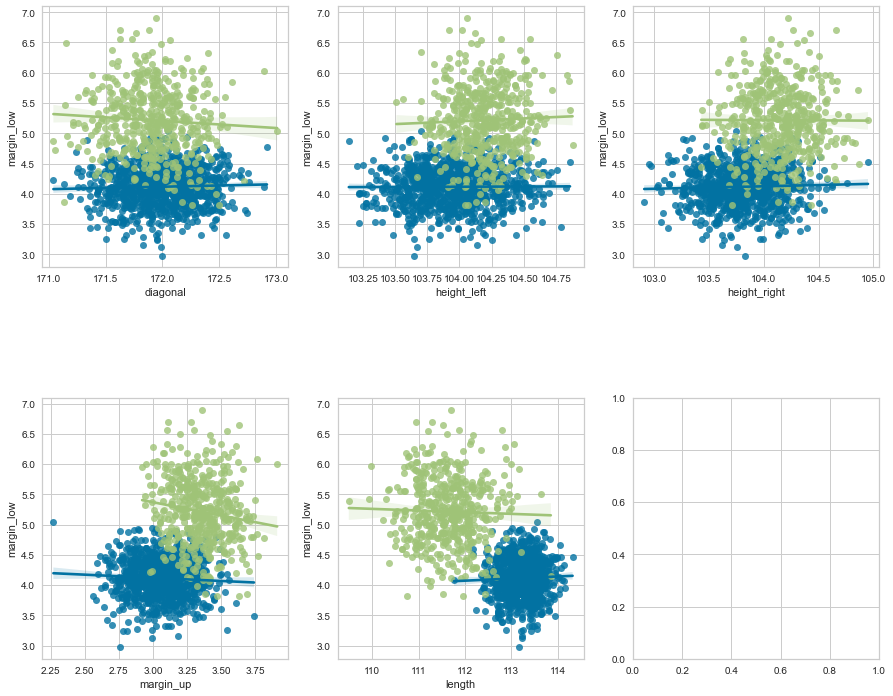

In [15]:
# Vérification de la linéarité
attributes = df.drop(["margin_low", "is_genuine"], axis=1)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
for a, ax in zip(attributes, axs.ravel()):
    sns.regplot(x=df_true[a], y=df_true["margin_low"], ax=ax)
    sns.regplot(x=df_false[a], y=df_false["margin_low"], ax=ax)
plt.show();

Pas de relation linéaire détectée entre margin_low et les autres variables.

In [129]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [125]:
df[df["margin_low"].isna()]["is_genuine"].value_counts()

True     29
False     8
Name: is_genuine, dtype: int64

In [127]:
df["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

**!!! Notre df est imbalanced (1000 T / 500 F), 70% de nos valeurs manquantes sont dans la classe "True dominante".  
La linéarité entre nos variables n'est pas établie.  
Dropna() semble être la meilleure solution.**  
Néanmoins, vérifions la méthode de la régression linéaire pour extrapoler nos valeurs manquantes.    
Choix de df ou df_no_out pour la suite de l'analyse (1500 ou 1454 individus)... ou du df.dropna() (1463 individus).

**Les outliers étant considérés comme des valeurs atypiques et non aberrantes, le df entier est conservé. 
Si notre modèle algorithmique "rencontre" ultérieurement des valeurs atypiques, il y sera entraîné.**

In [311]:
# Choix et test des différents df
# df_reg = df_no_out.copy()
df_reg = df.copy() # Sans tenir compte des outliers
# df_reg = df.dropna() # En supprimant les NaN
df_reg = pd.get_dummies(df_reg, columns=["is_genuine"], drop_first=True)
df_reg.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_True
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,172.69,104.48,103.50,4.40,2.94,113.16,1
3,171.36,103.91,103.94,3.62,3.01,113.51,1
4,171.73,104.28,103.46,4.04,3.48,112.54,1


In [399]:
# Séparation des valeurs manquantes
df_nan = df_reg[df_reg['margin_low'].isnull()==True]
df_reg = df_reg[df_reg['margin_low'].isnull()==False]

# Définition de X et y
X = df_reg.drop(["margin_low"],axis=1)
y = df_reg["margin_low"]

In [400]:
# Echantillonage train_test_split en gardans la même porportion True/False (stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20,
                                                    stratify=X["is_genuine_True"]
                                                   )

<IPython.core.display.Javascript object>

In [401]:
# Instanciation de la régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [402]:
#calcul du R² sur train
lr.score(X_train, y_train)

0.6159391285311316

In [403]:
#calcul du R² sur test
lr.score(X_test, y_test)

0.6168226812327302

Score médiocre que l'on check avec une cross validation.

In [404]:
# Check du R² avec cross validation
kfold = KFold(n_splits=5)
kf_cv_scores = cross_val_score(lr, X_test, y_test, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.60


In [405]:
scores = cross_val_score(lr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores
print(scores, np.mean(scores), np.std(scores))

[0.60973902 0.61474817 0.54977223 0.66630805 0.59783997] 0.6076814884826327 0.03726012029018564


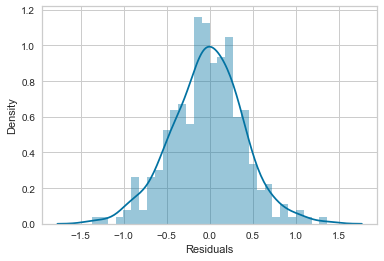

In [406]:
# Distribution des residus
predictions = lr.predict(X_test)
residuals = y_test - predictions

sns.distplot(residuals, bins=30)
plt.xlabel('Residuals');

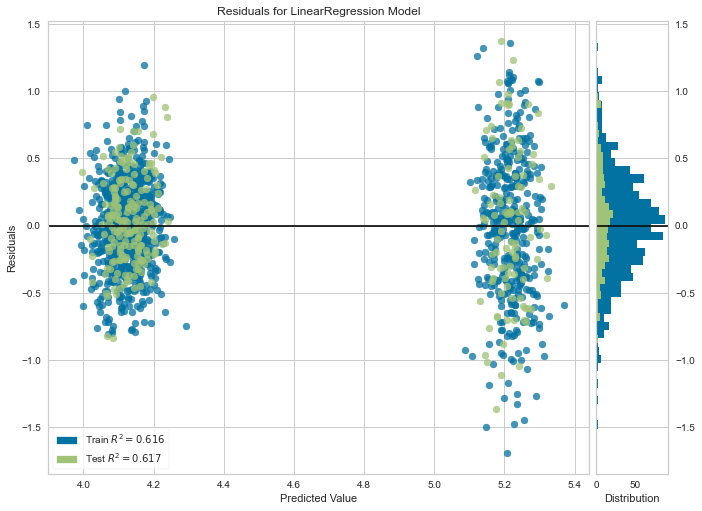

In [407]:
residual_lr = ResidualsPlot(lr, size=(800, 600))
residual_lr.fit(X_train, y_train)  # Fit the training data to the visualizer
residual_lr.score(X_test, y_test)  # Evaluate the model on the test data
residual_lr.show();

Distibution normale des résidus

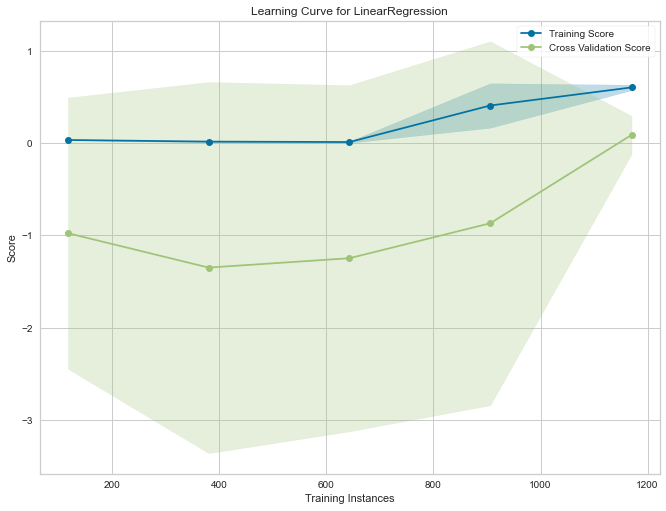

In [408]:
# Courbe d'apprentissage de la régression linéaire
lc_lr = LearningCurve(lr, scoring='r2', size=(800, 600))

lc_lr.fit(X, y)
lc_lr.show();

Les courbes semblent converger (tout en augmentant) mais avec un score médiocre. Plus de data pourraient a priori améliorer la prédiction.

---

### Polynomial regression

Essai d'une régression polynomiale pour améliorer les prédictions.

In [323]:
X_poly = df_reg.drop(["margin_low"], axis=1)
y_poly = df_reg["margin_low"]

In [324]:
# Après plusieurs tests, le meilleur score a été obtenue avec une fonction du 2nd degré
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_poly)

In [325]:
# Echantillonage
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(poly_features, y_poly, random_state=3, test_size=0.20, stratify=X["is_genuine_True"])

<IPython.core.display.Javascript object>

In [326]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_poly_train)

LinearRegression()

In [327]:
poly_reg_model.score(X_poly_test, y_poly_test)

0.6120164003078684

In [328]:
# RMSE polynomial regression
poly_reg_y_predicted = poly_reg_model.predict(X_poly_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_poly_test, poly_reg_y_predicted))
poly_reg_rmse

0.4210598426589324

In [329]:
# RMSE linear regression
lin_reg_y_predicted = lr.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

0.403452291524738

Très léger avantage à la régression polynomiale

### Autres méthodes de régression

Utiisation de LazyRegressor, non pas pour une réponse définitive, mais pour donner un axe de direction.

In [330]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:08<00:00,  5.11it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            0.54       0.55  0.40        0.18
LassoLarsIC                                  0.53       0.54  0.40        0.02
ElasticNetCV                                 0.53       0.54  0.40        0.15
LassoLarsCV                                  0.53       0.54  0.40        0.05
LarsCV                                       0.53       0.54  0.40        0.05
LassoCV                                      0.53       0.54  0.40        0.16
OrthogonalMatchingPursuitCV                  0.52       0.53  0.40        0.02
BayesianRidge                                0.52       0.53  0.40        0.03
SGDRegressor                                 0.52       0.53  0.40        0.02
Ridge                                        0.52       0.53  0.40        0.01
RidgeCV                                      0.52   

Test avec ridge car convient à un petit nombre d'individus

In [331]:
#Ridge method
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5).fit(X_train, y_train)

In [332]:
ridge.score(X_train, y_train)

0.6294752149539835

In [333]:
ridge.score(X_test, y_test)

0.5374954708059834

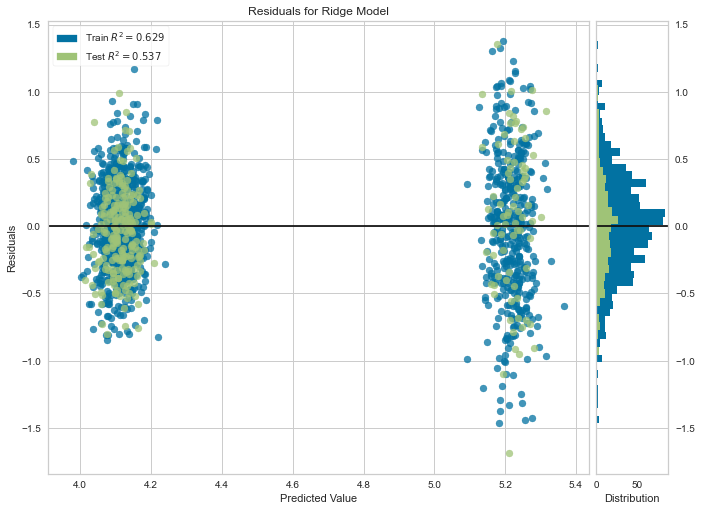

In [334]:
residual_r = ResidualsPlot(ridge, size=(800, 600))

residual_r.fit(X_train, y_train)  # Fit the training data to the visualizer
residual_r.score(X_test, y_test)  # Evaluate the model on the test data
residual_r.show();

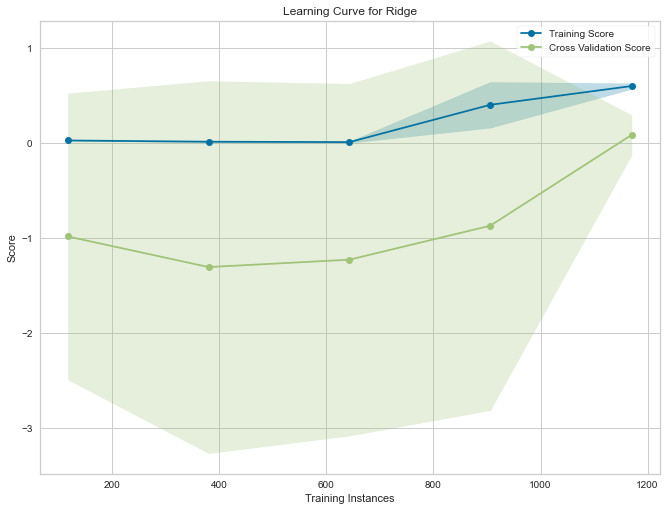

In [335]:
lc_r = LearningCurve(ridge, scoring='r2', size=(800, 600))

lc_r.fit(X, y)
lc_r.show();

Test avec Adaboost

In [336]:
# AdaBoost Regressor method
ada_reg = AdaBoostRegressor(n_estimators=100, learning_rate=1)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=100)

In [337]:
ada_reg.score(X_test, y_test)

0.5519189420807469

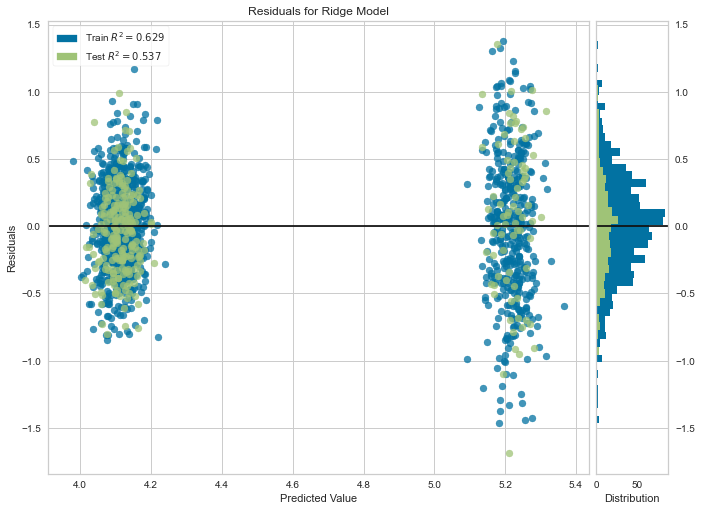

In [338]:
residual_ada = ResidualsPlot(ridge, size=(800, 600))

residual_ada.fit(X_train, y_train)  # Fit the training data to the visualizer
residual_ada.score(X_test, y_test)  # Evaluate the model on the test data
residual_ada.show();

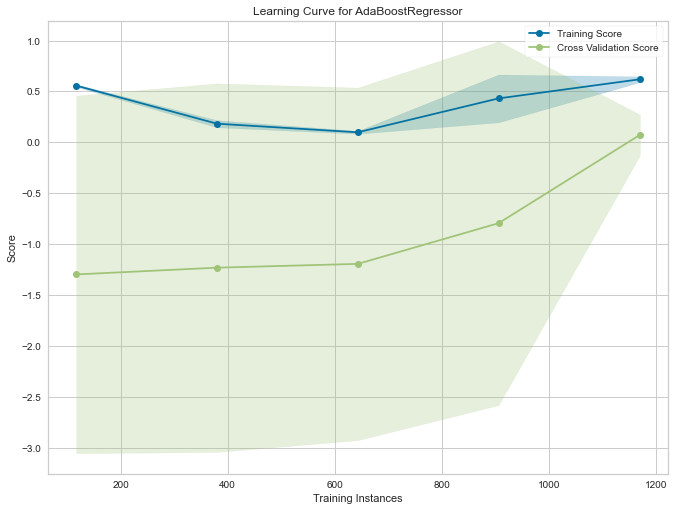

In [339]:
lc_ada = LearningCurve(ada_reg, scoring='r2', size=(800, 600))

lc_ada.fit(X, y)
lc_ada.show();

### Remplissage des NaN

Utilisation de la régression linéaire pour extrapoler les valeurs manquantes de margin_low.

In [340]:
df_nan.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_True
72,171.94,103.89,103.45,NaN,3.25,112.79,1
99,171.93,104.07,104.18,NaN,3.14,113.08,1
151,172.07,103.80,104.38,NaN,3.02,112.93,1
197,171.45,103.66,103.80,NaN,3.62,113.27,1
241,171.83,104.14,104.06,NaN,3.02,112.36,1


In [341]:
# Prédiction des margin_low NaN sur le df_nan
lr.predict(df_nan.drop("margin_low", axis=1))

array([4.04696474, 4.09877878, 4.12721775, 3.95946277, 4.12416171,
       4.07674547, 4.0583976 , 4.11257756, 4.08216276, 4.06754884,
       4.11426792, 4.17283583, 4.1289265 , 4.02911353, 4.17055235,
       4.21246421, 4.10429926, 4.09136984, 4.0717665 , 4.09191687,
       4.10350559, 4.13984864, 4.15387362, 4.09369547, 4.11046892,
       4.19294707, 4.09973812, 4.0748862 , 4.12408773, 5.26804962,
       5.26939825, 5.29140565, 5.32634979, 5.21939012, 5.17626308,
       5.20413657, 5.26192755])

In [342]:
# Remplissage des NaN
df_nan["margin_low"] = df_nan.apply(lambda x: lr.predict(df_nan.drop("margin_low", axis=1)))["margin_low"]

In [343]:
# Création du df_final pour la classification
df_final = pd.concat([df_reg, df_nan], axis=0)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagonal         1500 non-null   float64
 1   height_left      1500 non-null   float64
 2   height_right     1500 non-null   float64
 3   margin_low       1500 non-null   float64
 4   margin_up        1500 non-null   float64
 5   length           1500 non-null   float64
 6   is_genuine_True  1500 non-null   uint8  
dtypes: float64(6), uint8(1)
memory usage: 83.5 KB


In [344]:
# Comparaison des données statistiques (mesures de tendance centrale et mesures de dispersion) pour vérification
# Comparer 2 colonnes par 2 colonnes
df1 = pd.DataFrame(df["margin_low"].describe())
df1.columns = ["df"]
df2 = pd.DataFrame(df_final["margin_low"].describe())
df2.columns = ["df_final"]
df3 = pd.DataFrame(df[df["is_genuine"] == True]["margin_low"].describe())
df3.columns = ["df_true"]
df4 = pd.DataFrame(df_final[df_final["is_genuine_True"] == 1]["margin_low"].describe())
df4.columns = ["df_final_true"]
df5 = pd.DataFrame(df[df["is_genuine"] == False]["margin_low"].describe())
df5.columns = ["df_false"]
df6 = pd.DataFrame(df_final[df_final["is_genuine_True"] == 0]["margin_low"].describe())
df6.columns = ["df_final_false"]
df1.join(df2).join(df3).join(df4).join(df5).join(df6)

,df,df_final,df_true,df_final_true,df_false,df_final_false
count,1463.00,1500.00,971.00,1000.00,492.00,500.00
mean,4.49,4.48,4.12,4.12,5.22,5.22
std,0.66,0.66,0.32,0.31,0.55,0.55
min,2.98,2.98,2.98,2.98,3.82,3.82
25%,4.01,4.03,3.91,3.91,4.84,4.84
50%,4.31,4.31,4.11,4.11,5.19,5.20
75%,4.87,4.87,4.34,4.33,5.59,5.59
max,6.90,6.90,5.04,5.04,6.90,6.90


# Prediction - Binary classification

In [345]:
df_final["is_genuine_True"].value_counts()

1    1000
0     500
Name: is_genuine_True, dtype: int64

**!!! Imbalanced classification - existence d'un déséquilibre dans notre df_final au niveau de la target**

L'oversampling permet d'équilibrer le dataset en rajoutant des data concernant la classe (target) sous représentée.  
Une des façons de faire est de dupliquer les data de la classe "inférieure".

In [346]:
# Méthode de l'Oversampling
df_false = df_final[df_final["is_genuine_True"] == 0]

In [347]:
df_balanced = pd.concat([df_false, df_final], axis=0)
df_imbalanced = df_final.copy()

In [348]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1000 to 1438
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagonal         2000 non-null   float64
 1   height_left      2000 non-null   float64
 2   height_right     2000 non-null   float64
 3   margin_low       2000 non-null   float64
 4   margin_up        2000 non-null   float64
 5   length           2000 non-null   float64
 6   is_genuine_True  2000 non-null   uint8  
dtypes: float64(6), uint8(1)
memory usage: 111.3 KB


In [349]:
df_balanced["is_genuine_True"].value_counts()

0    1000
1    1000
Name: is_genuine_True, dtype: int64

**La méthode d'oversampling (en doublant les données dont la variable is_genuine == False) n'a pas été retenue compte tenu des résultats non significatifs obtenus. Non introduction de biais**

In [350]:
# Le df_imbalanced non équilibré est utilisé.
# Détermination de X (features) et de y (target)
X_bin = df_imbalanced.drop(["is_genuine_True"], axis=1)
y_bin = df_imbalanced["is_genuine_True"]

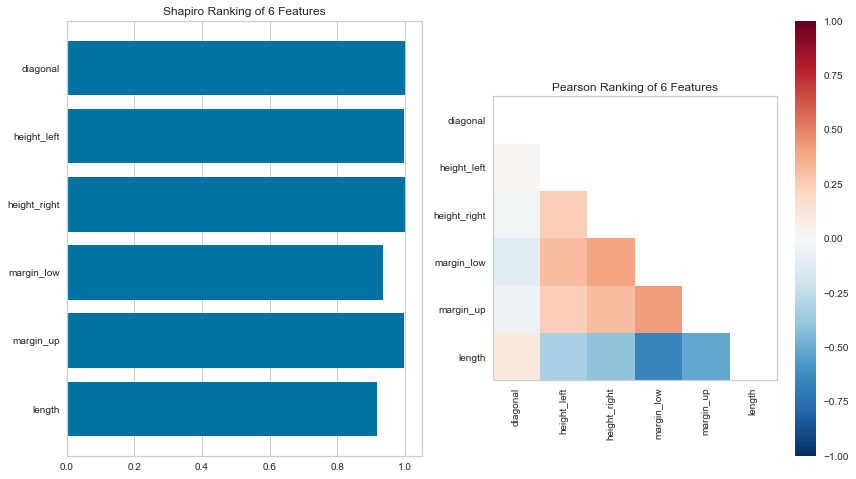

In [351]:
# Analyse des forces et corrélations des variables grâce à yellowbrick
fig, axes = plt.subplots(ncols=2, figsize=(14,8))

rank1d(X_bin, ax=axes[0], show=False)
rank2d(X_bin, ax=axes[1], show=False)
plt.show();

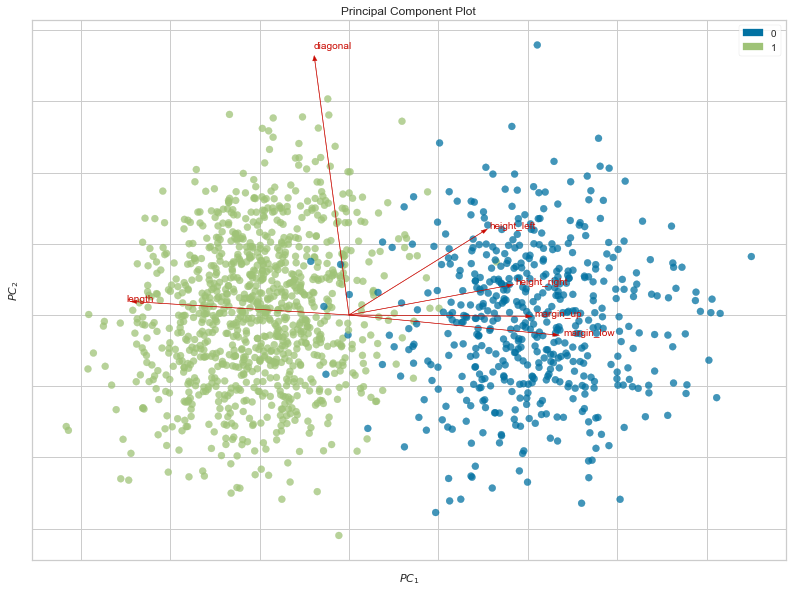

In [352]:
# PCA - biplot des individus et variables (yellobrick)
classes = [0, 1]
visualizer = PCA(scale=True, proj_features=True, classes=classes, size=(800, 600))
visualizer.fit_transform(X_bin, y_bin)
visualizer.show();

2 forces "s'affrontent" selon la méthode PCA. length et les 4 variables de margin et height s'opposent (sur la composante principale 1) et semblent bien délimiter le clustering is_genuine.  
diagonal, bien que fortement corrélé à PC2 ne semble pas être un arbitre.


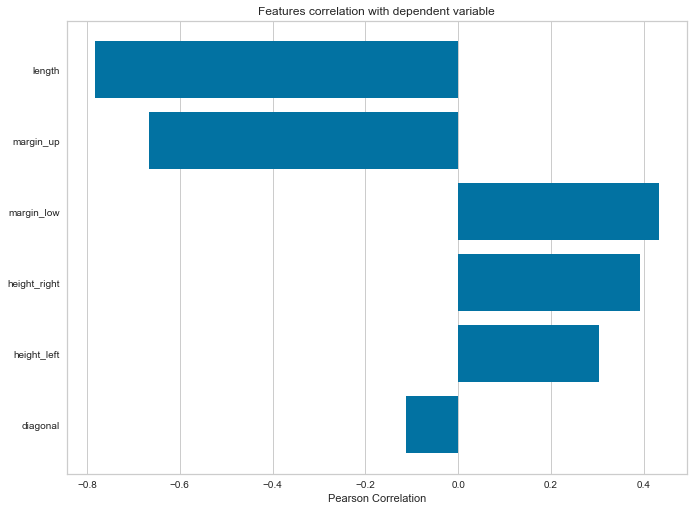

In [353]:
# Force des corrélations des variables par rapport à is_genuine
features = np.array(X_bin.columns)
visualizer = FeatureCorrelation(labels=features, size=(800, 600))

visualizer.fit(X, y)
visualizer.show();

In [530]:
# Echantillonage
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, random_state=42, stratify=y_bin)

<IPython.core.display.Javascript object>

In [531]:
# Vérification des algo susceptibles de répondre à la classification binaire avec LazyPredict
clf = LazyClassifier(verbose=0, ignore_warnings=True)
pd.options.display.max_columns = 30
models, predictions = clf.fit(X_bin_train, X_bin_test, y_bin_train, y_bin_test)
print(models)

100%|██████████| 29/29 [00:02<00:00, 10.85it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.99               0.99     0.99      0.99   
QuadraticDiscriminantAnalysis      0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
RandomForestClassifier             0.99               0.99     0.99      0.99   
PassiveAggressiveClassifier        0.99               0.99     0.99      0.99   
LinearSVC                          0.99               0.99     0.99      0.99   
SGDClassifier                      0.99               0.99     0.99      0.99   
GaussianNB                         0.99               0.99     0.99      0.99   
LogisticRegression                 0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.98     0.98      0.99   
CalibratedClassifierCV      

Accuracy très forte pour la plupart des algo. 
- Test avec RandomForest, bien que le plus lent, il donne souvent de très bons résultats
- Test avec LogisticRegression, très rapide et très bien adapté aux classifications binaires

### RandomForest

In [409]:
# Hyper paramétrage
rf1 = RandomForestClassifier()

param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

<IPython.core.display.Javascript object>

In [410]:
CV_rf = GridSearchCV(estimator=rf1, param_grid=param_grid, cv= 5)
CV_rf.fit(X_bin_train, y_bin_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [411]:
# Paramètres à retenir pour RandomForest
best_params = CV_rf.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 50}

In [532]:
rf = RandomForestClassifier(**best_params)
rf.fit(X_bin_train, y_bin_train)
y_bin_pred = rf.predict(X_bin_test)

<IPython.core.display.Javascript object>

In [533]:
print("Evaluation metrics - Random forest:")
print("Accuracy: " + str(metrics.accuracy_score(y_bin_test, y_bin_pred)))
print("F1 score: " + str(metrics.f1_score(y_bin_test, y_bin_pred, average="macro")))

Evaluation metrics - Random forest:
Accuracy: 0.992
F1 score: 0.990945018150208


<IPython.core.display.Javascript object>

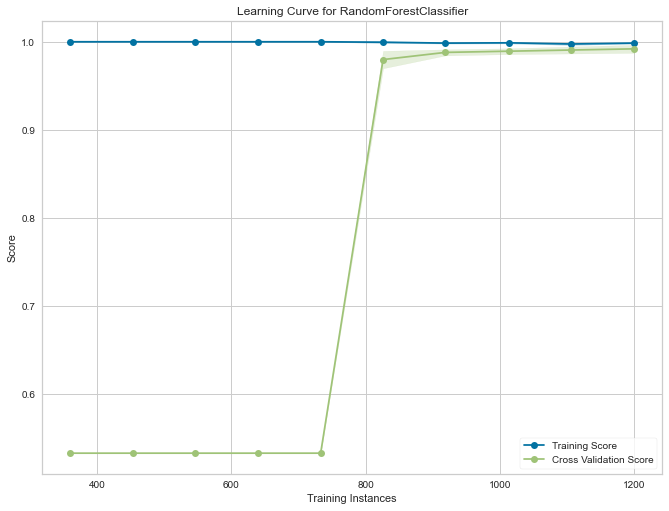

In [361]:
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

lc_rf = LearningCurve(
    rf, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4, size=(800, 600)
)
lc_rf.fit(X_bin, y_bin)
lc_rf.show();

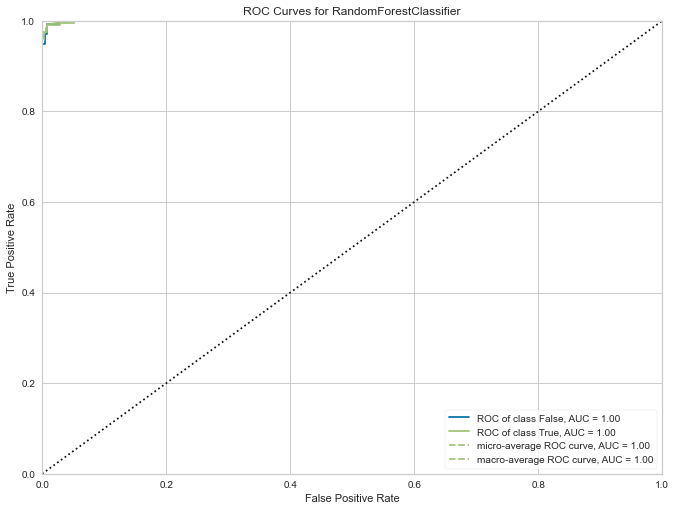

In [414]:
visualizer = ROCAUC(rf, classes=["False", "True"], size=(800, 600))

visualizer.fit(X_bin_train, y_bin_train)        # Fit the training data to the visualizer
visualizer.score(X_bin_test, y_bin_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and show the figure

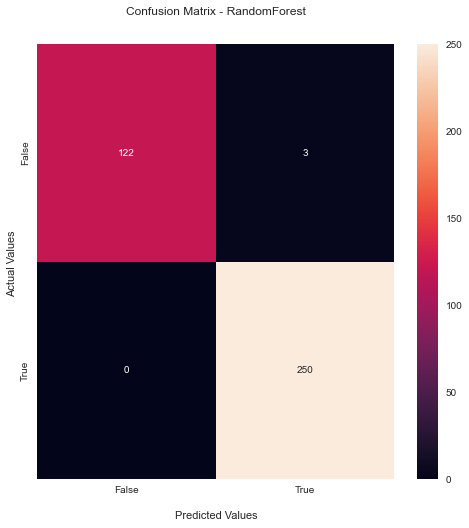

In [534]:
rf_matrix = confusion_matrix(y_bin_test, y_bin_pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(rf_matrix, annot=True, fmt='.3g')
ax.set_title('Confusion Matrix - RandomForest\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

In [523]:
import pickle
with open('api/model.pickle', 'wb') as f:
    pickle.dump(rf, f)

### LogisticRegression

In [416]:
logr1 = LogisticRegression()

parameters = {
    "penalty": ["l1", "l2"], 
    "C": np.logspace(-3,3,7),
    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
}

<IPython.core.display.Javascript object>

In [417]:
CV_logr = GridSearchCV(estimator=logr1, param_grid=parameters, cv= 5)
CV_logr.fit(X_bin_train, y_bin_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [418]:
# Paramètres à retenir pour LogisticRegression
best_params_logr = CV_logr.best_params_
best_params_logr

{'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [535]:
logr = LogisticRegression(**best_params_logr)
logr.fit(X_bin_train, y_bin_train)
y_bin_pred_logr = logr.predict(X_bin_test)

<IPython.core.display.Javascript object>

In [536]:
print("Evaluation metrics - Logistic regression:")
print("Accuracy: " + str(metrics.accuracy_score(y_bin_test, y_bin_pred_logr)))
print("F1 score: " + str(metrics.f1_score(y_bin_test, y_bin_pred_logr, average="macro")))

Evaluation metrics - Logistic regression:
Accuracy: 0.9893333333333333
F1 score: 0.9879514201259478


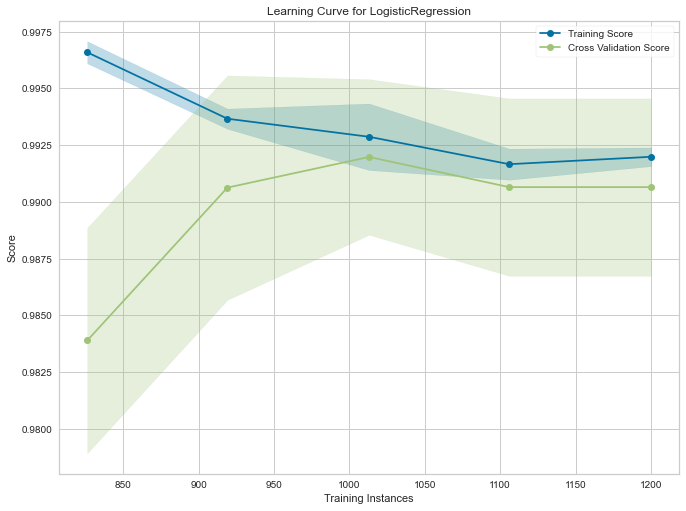

In [421]:
lc_logr = LearningCurve(
    logr, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4, size=(800, 600)
)
lc_logr.fit(X_bin, y_bin)
lc_logr.show();

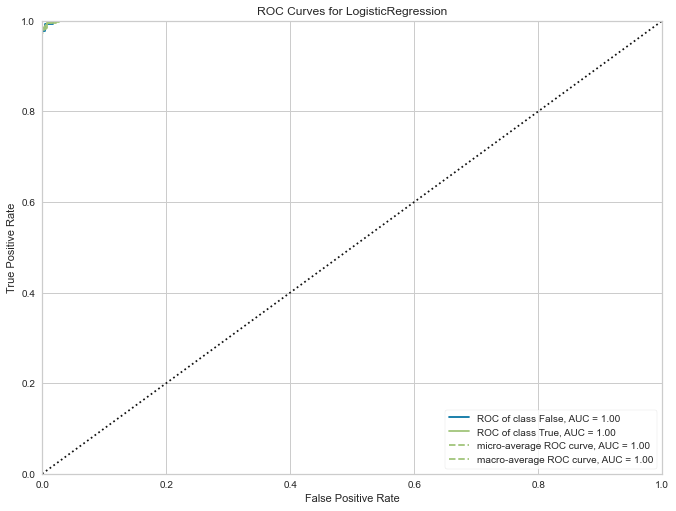

In [423]:
visualizer = ROCAUC(logr, classes=["False", "True"], size=(800, 600))

visualizer.fit(X_bin_train, y_bin_train)        # Fit the training data to the visualizer
visualizer.score(X_bin_test, y_bin_test)        # Evaluate the model on the test data
visualizer.show();

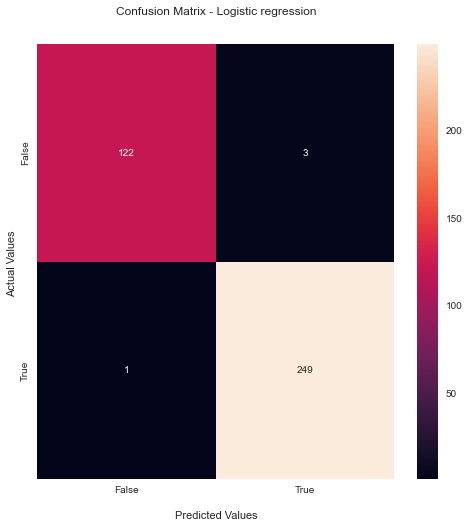

In [537]:
#Generate the confusion matrix
logr_matrix = confusion_matrix(y_bin_test, y_bin_pred_logr)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(logr_matrix, annot=True, fmt='.3g')
ax.set_title('Confusion Matrix - Logistic regression\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

### Kmeans classification

Bien que dédié à l'apprentissage non supervisé, testons la méthode de clustering kmeans en écartant la target et comparons les clusters obtenus (k=2 forcément) avec la target.

In [372]:
df_kmeans = df_final.copy()
df_kmeans.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_True
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,172.69,104.48,103.50,4.40,2.94,113.16,1
3,171.36,103.91,103.94,3.62,3.01,113.51,1
4,171.73,104.28,103.46,4.04,3.48,112.54,1


In [373]:
X_km = df_final.drop("is_genuine_True", axis=1)
y_km = df_final["is_genuine_True"]

In [374]:
# Meilleurs résultats avec MinMaxScaler
scaler =  MinMaxScaler()
X_km_scaled = scaler.fit_transform(X_km)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

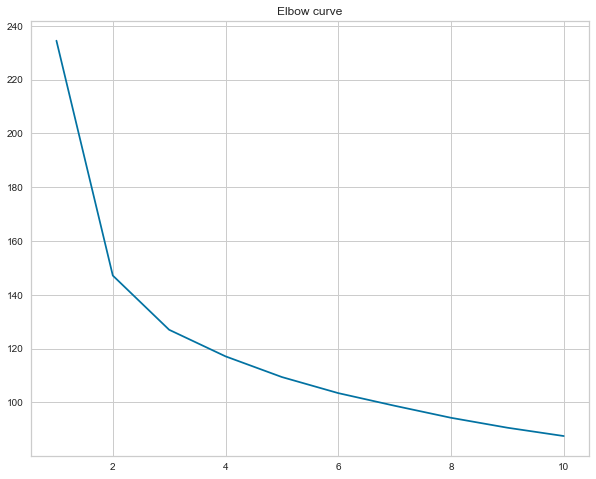

In [375]:
# "Vérification" du nombre de clusters optimal
inertia = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_km_scaled)   
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8))
plt.plot(range_n_clusters, inertia, 'bx-')
plt.title("Elbow curve")
plt.show();

"Rassurant", le nombre optimal de clusters est bien 2

In [376]:
kmeans = KMeans(n_clusters=2, random_state=40, max_iter=100, n_init=20)
kmeans.fit(X_km_scaled)

<IPython.core.display.Javascript object>

KMeans(max_iter=100, n_clusters=2, n_init=20, random_state=40)

In [377]:
df_kmeans["cluster"] = kmeans.labels_

In [378]:
df_kmeans.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_True,cluster
0,171.81,104.86,104.95,4.52,2.89,112.83,1,0
1,171.46,103.36,103.66,3.77,2.99,113.09,1,1
2,172.69,104.48,103.50,4.40,2.94,113.16,1,1
3,171.36,103.91,103.94,3.62,3.01,113.51,1,1
4,171.73,104.28,103.46,4.04,3.48,112.54,1,1


In [379]:
df_kmeans['Diff'] = np.where(df_kmeans["is_genuine_True"] == df_kmeans["cluster"] , 1, 0)

In [380]:
df_kmeans['Diff'].value_counts()

1    1481
0      19
Name: Diff, dtype: int64

In [381]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y_km == labels)

print(f"Result: {correct_labels} out of {y_km.size} samples were correctly labeled.")

Result: 1481 out of 1500 samples were correctly labeled.


In [382]:
print(f"Accuracy score: {correct_labels/float(y_km.size):.2f}")

Accuracy score: 0.99


### MLP

In [383]:
from sklearn.neural_network import MLPClassifier

In [576]:
X_mlp = X_bin.copy()
y_mlp = y_bin.copy()

X_mlp_train, X_mlp_test, y_mlp_train, y_mlp_test = train_test_split(X_mlp, y_mlp)

<IPython.core.display.Javascript object>

In [577]:
scaler = StandardScaler().fit(X_mlp_train)
X_mlp_train = scaler.transform(X_mlp_train)
X_mlp_test = scaler.transform(X_mlp_test)

<IPython.core.display.Javascript object>

In [578]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100], alpha=10).fit(X_mlp_train, y_mlp_train)
y_mlp_pred = mlp.predict(X_mlp_test)

In [579]:
print("Evaluation metrics - MLP:")
print("Accuracy: " + str(metrics.accuracy_score(y_mlp_test, y_mlp_pred)))
print("F1 score: " + str(metrics.f1_score(y_mlp_test, y_mlp_pred, average="macro")))

Evaluation metrics - MLP:
Accuracy: 0.992
F1 score: 0.9911535043917936


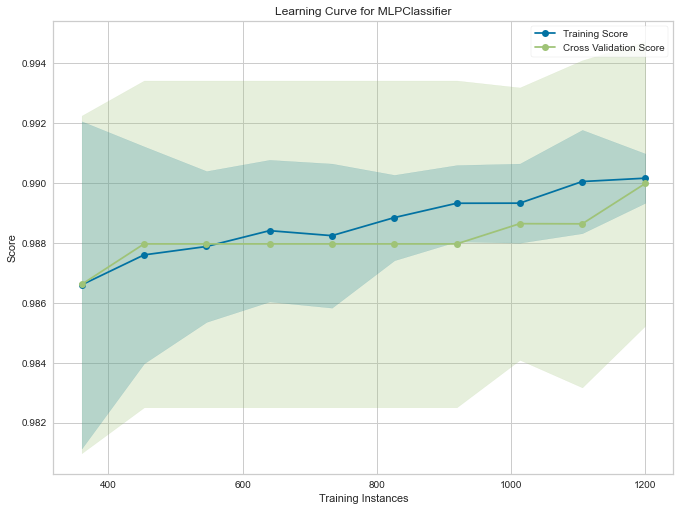

In [580]:
lc_mlp = LearningCurve(
    mlp, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=-1, size=(800, 600)
)
lc_mlp.fit(X_mlp, y_mlp)
lc_mlp.show();

### SVM

In [571]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', C=10, gamma=0.1).fit(X_mlp_train, y_mlp_train)
y_svm_pred = svm.predict(X_mlp_test)

In [572]:
print("Evaluation metrics - SVM:")
print("Accuracy: " + str(metrics.accuracy_score(y_mlp_test, y_svm_pred)))
print("F1 score: " + str(metrics.f1_score(y_mlp_test, y_svm_pred, average="macro")))

Evaluation metrics - SVM:
Accuracy: 0.9946666666666667
F1 score: 0.9936668242923732


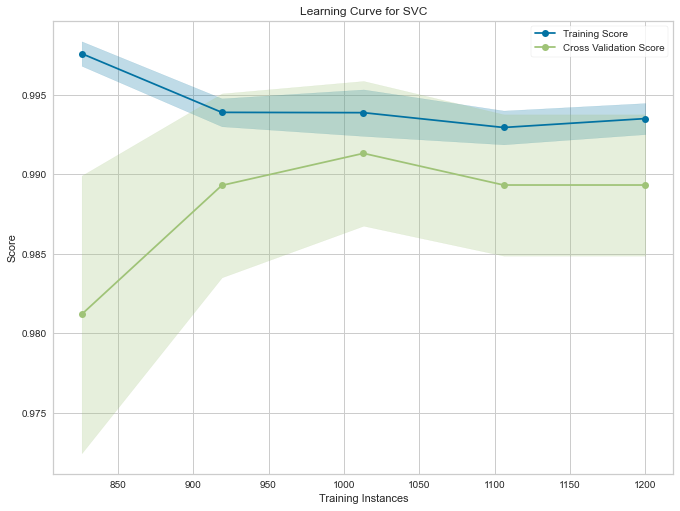

In [562]:
lc_svm = LearningCurve(
    svm, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=-1, size=(800, 600)
)
lc_mlp.fit(X_mlp, y_mlp)
lc_mlp.show();

# Vérification

**Bank notes analysis API http://localhost:8501/**

In [388]:
# Importation et mise en forme du fichier test pour valider les algos 
df_verif = pd.read_csv("billets_production.csv")
id = df_verif["id"]
df_verif.drop("id", axis=1, inplace=True)
df_verif.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [554]:
# Vérification RandomForest
df11 = pd.DataFrame(rf.predict(df_verif))
df11.columns = ["is_genuine"]
df11["is_genuine"] = np.where(df11["is_genuine"] == 1 , True, False)
df12 = pd.DataFrame(rf.predict_proba(df_verif))
df12.columns = ["proba_false", "proba_true"]
df12["id"] = id
rf_result = df11.join(df12)
rf_result 

,is_genuine,proba_false,proba_true,id
0,False,0.98,0.02,A_1
1,False,1.00,0.00,A_2
2,False,1.00,0.00,A_3
3,True,0.09,0.91,A_4
4,True,0.00,1.00,A_5


In [542]:
# Vérification LogisticRegression
df11 = pd.DataFrame(logr.predict(df_verif))
df11.columns = ["is_genuine"]
df11["is_genuine"] = np.where(df11["is_genuine"] == 1 , True, False)
df12 = pd.DataFrame(logr.predict_proba(df_verif))
df12.columns = ["proba_false", "proba_true"]
df12["id"] = id
df11.join(df12)

,is_genuine,proba_false,proba_true,id
0,False,1.00,0.00,A_1
1,False,1.00,0.00,A_2
2,False,1.00,0.00,A_3
3,True,0.02,0.98,A_4
4,True,0.00,1.00,A_5


In [391]:
# Vérification K-means
kmeans.predict(df_verif)

array([1, 1, 1, 1, 1])

In [581]:
# Vérification MLP
df11 = pd.DataFrame(mlp.predict(df_verif))
df11.columns = ["is_genuine"]
df11["is_genuine"] = np.where(df11["is_genuine"] == 1 , True, False)
df12 = pd.DataFrame(mlp.predict_proba(df_verif))
df12.columns = ["proba_false", "proba_true"]
df12["id"] = id
df11.join(df12)

,is_genuine,proba_false,proba_true,id
0,True,0.00,1.00,A_1
1,True,0.00,1.00,A_2
2,True,0.00,1.00,A_3
3,True,0.00,1.00,A_4
4,True,0.00,1.00,A_5


In [570]:
# Vérification svm
svm.predict(df_verif)

array([0, 0, 0, 0, 0], dtype=uint8)

# Pour aller plus loin

### Pipeline

Utilisation d'un pipeline pour généraliser l'exercice.  
2 étapes :  
- Imputation des valeurs manquantes (is_genuine n'est pas utilisé ici pour extrapoler margi_low)  
- RandomForest est choisi comme modèle (en gardant les hyper-paramètres obtenus préalablement)

In [393]:
# Définition du jeu de données
X_pip = df.drop("is_genuine", axis=1)
y_pip = df["is_genuine"]
X_pip_train, X_pip_test, y_pip_train, y_pip_test = train_test_split(
    X_pip, y_pip, random_state=3, test_size=0.20
)

<IPython.core.display.Javascript object>

In [394]:
# Création du pipeline
rf_pip = Pipeline(
    steps=[
        ("imputer", IterativeImputer()),
        ("classifier", RandomForestClassifier(
            criterion="gini",
            max_depth=4,
            max_features="auto",
            n_estimators=100))           
        ])

<IPython.core.display.Javascript object>

In [395]:
# Fit + score
rf_pip.fit(X_pip_train, y_pip_train)
preds = rf_pip.predict(X_pip_test)
print(f"Accuracy: " + str(metrics.accuracy_score(y_pip_test, preds)))
print(f"F1 score: " + str(metrics.f1_score(y_pip_test, preds, average="macro")))

Accuracy: 0.9933333333333333
F1 score: 0.992422711658921


In [396]:
# Vérification RandomForest
df21 = pd.DataFrame(rf_pip.predict(df_verif))
df21.columns = ["is_genuine"]
df21["is_genuine"] = np.where(df21["is_genuine"] == 1 , True, False)
df22 = pd.DataFrame(rf_pip.predict_proba(df_verif))
df22.columns = ["proba_false", "proba_true"]
df22["id"] = id
df21.join(df22)

,is_genuine,proba_false,proba_true,id
0,False,0.96,0.04,A_1
1,False,0.99,0.01,A_2
2,False,1.00,0.00,A_3
3,True,0.09,0.91,A_4
4,True,0.01,0.99,A_5


### Utilisation des variables length et margin_low uniquement

In [466]:
df_imbalanced.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_True
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,172.69,104.48,103.50,4.40,2.94,113.16,1
3,171.36,103.91,103.94,3.62,3.01,113.51,1
4,171.73,104.28,103.46,4.04,3.48,112.54,1


In [544]:
X_2var = df_imbalanced[["margin_low", "length"]]
y_2var = df_imbalanced["is_genuine_True"]

In [545]:
X_2var_train, X_2var_test, y_2var_train, y_2var_test = train_test_split(X_2var, y_2var, stratify=y_2var)

<IPython.core.display.Javascript object>

In [497]:
logr_2var1 = LogisticRegression()

parameters = {
    "penalty": ["l1", "l2"], 
    "C": np.logspace(-3,3,7),
    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
}

<IPython.core.display.Javascript object>

In [498]:
CV_2var_logr = GridSearchCV(estimator=logr_2var1, param_grid=parameters, cv= 5)
CV_2var_logr.fit(X_2var_train, y_2var_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [499]:
# Paramètres à retenir pour LogisticRegression
best_params_2var_logr = CV_2var_logr.best_params_
best_params_2var_logr

{'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [546]:
logr_2var = LogisticRegression(**best_params_2var_logr)
logr_2var.fit(X_2var_train, y_2var_train)
y_bin_pred_2var_logr = logr_2var.predict(X_2var_test)

<IPython.core.display.Javascript object>

In [547]:
print("Evaluation metrics - Logistic regression:")
print("Accuracy: " + str(metrics.accuracy_score(y_2var_test, y_bin_pred_2var_logr)))
print("F1 score: " + str(metrics.f1_score(y_2var_test, y_bin_pred_2var_logr, average="macro")))

Evaluation metrics - Logistic regression:
Accuracy: 0.9813333333333333
F1 score: 0.9787835926449787


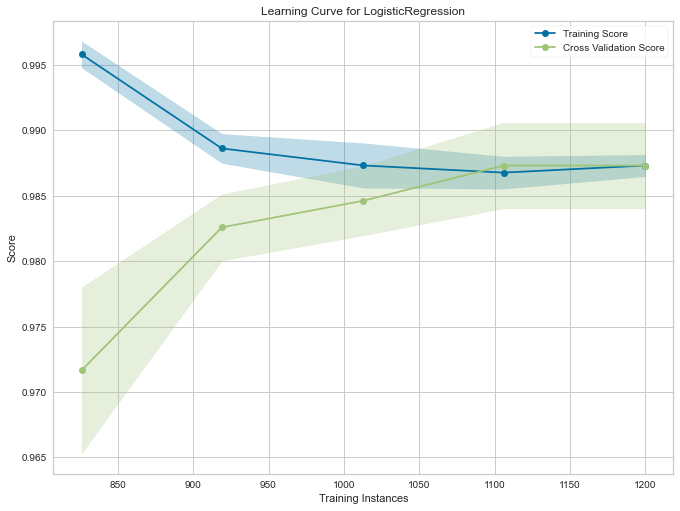

In [508]:
lc_2var_logr = LearningCurve(
    logr_2var, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4, size=(800, 600)
)
lc_2var_logr.fit(X_2var, y_2var)
lc_2var_logr.show();

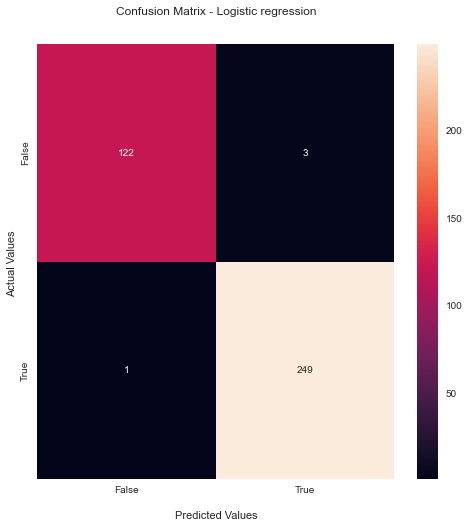

In [548]:
#Generate the confusion matrix
logr_2var_matrix = confusion_matrix(y_2var_test, y_bin_pred_2var_logr)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(logr_matrix, annot=True, fmt='.3g')
ax.set_title('Confusion Matrix - Logistic regression\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

In [549]:
# Vérification LogisticRegression avec 2 variables
df11 = pd.DataFrame(logr_2var.predict(df_verif[["margin_low", "length"]]))
df11.columns = ["is_genuine"]
df11["is_genuine"] = np.where(df11["is_genuine"] == 1 , True, False)
df12 = pd.DataFrame(logr_2var.predict_proba(df_verif[["margin_low", "length"]]))
df12.columns = ["proba_false", "proba_true"]
df12["id"] = id
df11.join(df12)

,is_genuine,proba_false,proba_true,id
0,False,1.00,0.00,A_1
1,False,1.00,0.00,A_2
2,False,1.00,0.00,A_3
3,True,0.00,1.00,A_4
4,True,0.00,1.00,A_5


**L'utilisation seules des variables length et margin_low est efficiente.  
Cela pourrait suffir pour déployer le modèle et faciliter la prise de mesures des billets de banque.**